In [1]:
import pandas as pd

# Solving (non-)Linear Programs 

__Housekeeping Item:__

1. Please email acleon@ust.hk if you have admin questions.
2. Please post your content questions in the Canvas discussions.
    - I will answer them in great detail.
3. If you email me, then I will politely refer you to \#1 \& \#2.
4. If you ask me in person, then I will politely refer you to \#1 \& \#2.


# Solving (non-)Linear Programs 

Three goals for this assignment:

1. Develop intuition about shadow prices.
2. Get repetitions of __optimization set-up__
3. Solidify your __optimization workflow__

If you can walk someone through how to do these optimizations using your tool of choice then you are making good progress.

## Shadow prices

Let's think about cost, and how cost depends on the way a choice problem
is framed. Let's imagine that your company now produces two products.
Let $x$ and $y$, respectively, denote the quantities of the two products
that are produced and sold. Any nonnegative quantities satisfying the
following constraints can be produced:

$$x+y\leq 400$$
$$x+2y \leq 500$$

Your firm's revenue is given by $40x + 42y$, and your cost is given by
$30x + 30y$. (Though this is clearly a short-run story, as capacity is
fixed, we suppress the fixed cost and measure "profit" as $10x + 12y$.)

### Do the following:

1.  Determine an optimal solution for your firm.
2.  Determine the shadow prices on the two constraints.
3.  In what sense are the shadow prices on the two constraints
    opportunity costs?

## Step 1: Choice variables

What are we choosing in this framing of the problem?

$x$ and $y$. Include any natural (implied) constraints, i.e. no negative production.

In [2]:
# fire up gekko 
from gekko import GEKKO 
m=GEKKO(remote=False)
# define the choices
x=m.Var(name="x",lb=0)
x.value=1
y=m.Var(name="y",lb=0)
y.value=1

## Step 1: Objective Function

We want to __maximize__ profit.

$$\Pi = 10x + 12y$$

In [3]:
# and write down the objective function
m.Maximize(10*x+12*y) # version for gekko 
def profit(x,y):
    return 10*x+12*y # version for use to use later 

## Step 2: Constraints

$$x+y\leq 400$$
$$x+2y \leq 500$$

You may simplify here if needed. Once you've specified everything your set up is complete.

In [4]:
m.Equation(x+y<400)
m.Equation(x+2*y<500)

## Step 3: SOLVE

In [5]:
m.solve(disp=False) 
pi_0=profit(x.value[0],y.value[0])
print("x:      ", int(x.value[0]))
print("y:      ", int(y.value[0]))
print("Profit: ",pi_0)

x:       300
y:       100
Profit:  4200.0


### What the heck is a shadow price?

For a given objective function and constraint, the _shadow price_ on the constraint is the __rate at which the value of the objective function changes as the constraint is relaxed.__[<sup>1</sup>](#fn1)

<span id="fn1"><sup>1: Shadow prices are often called Legrange multipliers. </sup><span>

### What the heck is a shadow price?

 We often are interested in calculating the change over a specific number of units, as this allows us to characterize the benefit of relaxing the constraint by a specific increment.

You can think of the _shadow price_ as the opportunity cost of __not__ relaxing the constraint. 

Shadow prices are key when we consider the costs and benefits of relaxing constraints.

### So lets relax the first constraint by 1 unit

In [10]:
# same set up as before
from gekko import GEKKO 
m=GEKKO(remote=False)
# define the variables
x=m.Var(name="x",lb=0)
x.value=1
y=m.Var(name="y",lb=0)
y.value=1

In [11]:
m.Maximize(10*x+12*y)

m.Equation(x+y<401) # <-- added 1, no other changes

m.Equation(x+2*y<500)

In [12]:
m.solve(disp=False) 
pi_1=profit(x.value[0],y.value[0])
print("x:      ", x.value[0])
print("y:      ", y.value[0])
print("Profit: ",pi_1)
print("Benefit of relaxing the first constraint by one unit: ",int(pi_1-pi_0))

x:       302.0
y:       99.0
Profit:  4208.0
Benefit of relaxing the first constraint by one unit:  8


### Then lets relax the second constraint by 1 unit

In [13]:
# same set up as before
from gekko import GEKKO 
m=GEKKO(remote=False)
# define the variables
x=m.Var(name="x",lb=0)
x.value=1
y=m.Var(name="y",lb=0)
y.value=1

In [14]:
m.Maximize(10*x+12*y)

m.Equation(x+y<400) # back to the original value

m.Equation(x+2*y<501) # <-- added 1, no other changes

In [16]:
m.Maximize(10*x+12*y)

m.Equation(x+y<400) # back to the original value

m.Equation(x+2*y<501) # <-- added 1, no other changes

m.solve(disp=False) 
pi_2=profit(x.value[0],y.value[0])
print("x:      ", x.value[0])
print("y:      ", y.value[0])
print("Profit: ",pi_2)
print("Benefit of relaxing the second constraint by one unit: ",int(pi_2-pi_0))

x:       299.0
y:       101.0
Profit:  4202.0
Benefit of relaxing the second constraint by one unit:  2



## Component Searches and Product Cost

Let's keep thinking about the scenario above. Now let's think in terms
of how many units of the first product, $x$, to produce and sell.
Clearly we require $0 \leq x \leq 400$. Within this range, it should
also be clear you would produce as many units of the second product as
possible. The constraints imply, for any such $x$, the corresponding choice of
$y$ would be $y = g(x) = min\{400 - x, 0.5(500 - x)\}$. 

This implies profit as a function of $x$ given by
$10x + 12g(x) = 10x + 12 \times min\{400 - x, 0.5(500 - x)\}$.

## 4.1 Plot the profit function

$10x + 12g(x) = 10x + 12 \times min\{400 - x, 0.5(500 - x)\}$.

Let's set this up as simply as possible

In [17]:
# anytime we want to plot np and pd will be a great place to start
import numpy as np
import pandas as pd

In [18]:
# set up the x range
minx=0
maxx=400
x=np.linspace(minx,maxx,maxx)

## Keep things simple  
$$\Pi=10x + 12g(x)=10x + 12 \times min\{400 - x, 0.5(500 - x)\}$$

We just have two options for $g(x)$, calculate both, then apply the condition.

In [19]:
# calc both g(x) options
g_0=400-x
g_1=.5*(500-x)

In [20]:
# calc y using the np.where function
y = np.where(g_0<=g_1,g_0,g_1)
# and calc profit
profit=10*x+12*y

### At this point we can toss this to pandas and plot

<Axes: >

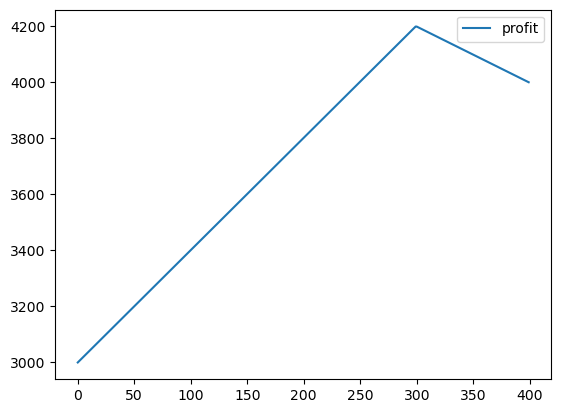

In [21]:
df=pd.DataFrame({"profit":profit})
df.plot()

#### 4.2 The optimal point is at $x=300$ which implies $y=100$ in this framing


5.  Next, observe (but verify that) this function simplifies to
    $10x+3,000-6x$ if $0 \leq x \leq 300$ and $10x+4,800-12x$ if
    $300 \leq x \leq 400$. Concentrate on the first range. What is the
    implied incremental or marginal cost of the first product in this
    range? Carefully explain your answer, in light of the fact this
    product was previously viewed as providing revenue of 40 per unit
    less cost of 30 per unit.
6.  Why does the cost of the product depend on the decision frame?

## Why is the profit function $10x + 3,000 - 6x$?

Step back to $\Pi=10x+12y$

Revenue from $x$ is 40.
Cost of $x$ is 30. So the first term is clear. If we frame the decision as two independent choices, then this (30) is the marginal cost of $x$.

__However,__ when we substitute $(.5(500-x))$ for $y$ we are framing $y$ as a consequence of $x$ not as an independent choice.

$$\Pi=10x+12y$$
$$\Pi=10x+12(.5(500-x))$$
$$\Pi=10x + 3,000 - 6x$$

Framed this way with $y$ expressed as a function of $x$ our choice of $x$ incurs additional costs through its effect on $y$. $6x$ is change in the cost of $y$ from a unit change in $x$.

<!-- Framing one way or another varies what is treated explicitly versus implicitly here. For 0 ≤ x ≤ 300, x costs 30 per unit if we also treat y as an explicit choice; otherwise we must burden the cost of x with the effect producing x has on our choice of y. This is why, in the reduced frame, the proper way to think about the cost of x is 36 per unit, not 30 per unit. -->

<!-- You are acquiring managerial sophistication when you recognize (1) cost is used to control for aspects of the payoff or outcome structure not explicitly modeled; and (2) therefore what you mean by cost depends on how you have framed your analyses. -->

## Builder of garages and sheds

A builder specializes in the construction of car garages and tool sheds. It has at most 80 hours available to frame the garages and tool sheds and at most 74
hours to roof the garages and tool sheds. It takes 10 hours to frame a garage
and 7 hours to roof it. It takes 4 hours to frame a tool shed and 5 hours to
roof it. If the builder makes a profit of \\$570 per garage and \\$300 per tool
shed, how many can he build to receive a maximum profit?

### Do the following:
1. Formulate the builder's decision as a linear program.  You do not need to solve the program.
2. Sketch the feasible set.  Be sure to label the axes carefully.  On the graph, circle any point corresponding to values of the choice variables that you think are likely a to be optimal.

# Choice variables:

In [22]:
from gekko import GEKKO 
m=GEKKO(remote=False)
# define the variables
x=m.Var(name="sheds",lb=0)
x.value=1
y=m.Var(name="garages",lb=0)
y.value=1

# Objective function:

In [23]:
m.Maximize(300*x+570*y)
def profit(x,y):
    return 300*x+570*y

# Constraints:

In [24]:
m.Equation(4*x+10*y<80) # framing constraint
m.Equation(5*x+7*y<74) # roofing constraint

# Solve!!!
Just for fun :)

In [25]:
m.solve(disp=False) 
pi=profit(x.value[0],y.value[0])
print("x:      ", int(x.value[0]))
print("y:      ", int(y.value[0]))
print("Profit: ",int(pi))

x:       8
y:       4
Profit:  5149


# Plot

We can set this up as $y=f(x)$ 

In [26]:
# set our x axis
x=np.linspace(0,20,20)

In [27]:
# calculate the values of the constraints along x
frame_const=(80-4*x)/10
roof_const=(74-5*x)/7

<Axes: >

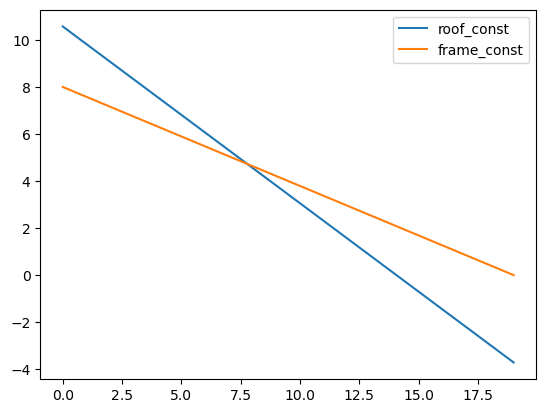

In [28]:
# toss these arrays to pandas for a quick plot
pd.DataFrame({"roof_const":roof_const,"frame_const":frame_const}).plot()

## Ava Catering

### Setup:
Ava runs a full-service catering business where she caters banquets and receptions. She prepares food ahead of time and she sets up tables on the day of the event. Food preparation for banquets is 12 hours and for receptions is 4, while setup hours for banquets is 9 hours and receptions is 6 hours. The maximum hours available for food preparation are 35 hours and for setup are 40 hours. If she makes \\$800 for each banquet and \\$525 for each reception, how many banquets and receptions can Ava cater to make a maximum profit?

In [29]:
m=GEKKO(remote=False)
# 1 choices
x=m.Var(name="banquets",lb=0)
x.value=1
y=m.Var(name="receptions",lb=0)
y.value=1

In [30]:
# 2 objective
m.Maximize(800*x+525*y)
def profit(x,y):
    return 800*x+525*y

In [31]:
# 3 constraints
m.Equation(12*x+4*y<35) # prep time constraint
m.Equation(9*x+6*y<40) # roofing constraint

In [32]:
# 4 solve
m.solve(disp=False) 
pi_1=profit(x.value[0],y.value[0])
print("x:      ", int(x.value[0]))
print("y:      ", int(y.value[0]))
print("Profit: ",int(pi_1))

x:       1
y:       4
Profit:  3517


1. What risks do you think a real business should consider that are not described here?

2. Describe how you would gather and analyze this information.

3. Based on the risks and the profit you expect, would you recommend opening a catering business to compete with Ava? Please describe your reasoning in detail.